In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("My Drive/10X/Week1/clean_df.csv")
dftel = df[df['Handset Type'] != 'undefined']
dftel.head()

,Unnamed: 0,Bearer Id,Start,End,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Total Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Other Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes)
0,9,-9223372036854775808,2019-04-15 00:32:00,2019-04-25 00:40:00,864482,208200314385130,33659219748,35573109931422,L20434C,97.0,...,22417975.0,850570347.0,1585413,872988322.0,8778341,766046.0,77671250.0,22911539.0,13185350.0,812946425.0
1,11,-9223372036854775808,2019-04-15 11:33:00,2019-04-25 18:44:00,889834,208201908306215,33664473872,86009102759374,T21335C,217.0,...,33691738.0,535118044.0,839351,568809782.0,8822396,2348652.0,538369717.0,19623308.0,20124838.0,505668618.0
2,14,-9223372036854775808,2019-04-16 00:35:00,2019-04-25 00:40:00,777887,208200314385130,33659219748,35573109931422,L20434C,79.0,...,32480400.0,298662697.0,2480347,331143097.0,7991932,3672362.0,50438697.0,25308492.0,26233613.0,255096405.0
3,15,7277825621540039680,2019-04-16 08:56:00,2019-04-25 09:44:00,780471,208201716888047,33753758738,35573009195619,T88606B,39.0,...,58387271.0,42659750.0,2066962,101047021.0,6491896,2653810.0,152500509.0,26558004.0,5557753.0,42366688.0
4,20,-9223372036854775808,2019-04-17 00:35:00,2019-04-25 04:52:00,706649,208201008643031,33658752999,86540802106829,T29714B,409.0,...,26026033.0,422406937.0,3193807,448432970.0,10756348,1044493.0,161491704.0,25470580.0,33305076.0,374527977.0


## Top 10 handsets used by the customers

Top 10 handsets used: 
 Huawei B528S-23A                3198
Apple iPhone 6 (A1586)           961
Apple iPhone 6S (A1688)          809
Apple iPhone 7 (A1778)           765
Samsung Galaxy S8 (Sm-G950F)     517
Apple iPhone 8 (A1905)           483
Apple iPhone Se (A1723)          459
Apple iPhone X (A1901)           395
Samsung Galaxy S7 (Sm-G930X)     386
Huawei E5180                     378
Name: Handset Type, dtype: int64 



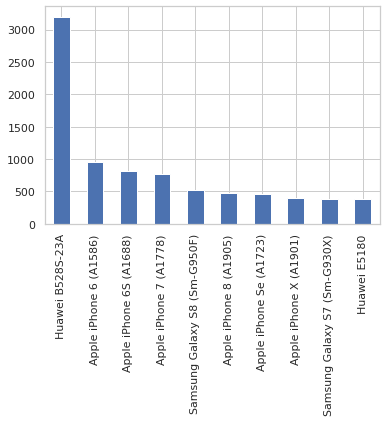

In [13]:
sns.set_theme(style="whitegrid")
top_10_handsets = dftel['Handset Type'].value_counts()[:10]
print("Top 10 handsets used: \n", top_10_handsets, "\n")
top_10_handsets.plot(kind='bar')

## Top 3 handset manufacturers



Top 3 manufacturers: 
 Apple      6128
Huawei     5478
Samsung    4965
Name: Handset Manufacturer, dtype: int64 



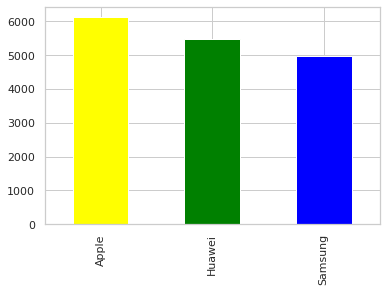

In [19]:
top_3_manf = dftel['Handset Manufacturer'].value_counts()
print("\n\nTop 3 manufacturers: \n", top_3_manf.head(3), '\n')
top_3_manf.head(3).plot(kind='bar', color=['yellow', 'green', 'blue'])

## Top 5 handsets per top 3 manufacturers

In [29]:
top_3 = dftel[dftel["Handset Manufacturer"].isin(top_3_manf.head(3).index.tolist())]
top_sets = top_3['Handset Type'].groupby(dftel['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_sets

Handset Manufacturer                                   
Apple                 Apple iPhone 6 (A1586)                961
                      Apple iPhone 6S (A1688)               809
                      Apple iPhone 7 (A1778)                765
                      Apple iPhone 8 (A1905)                483
                      Apple iPhone Se (A1723)               459
Huawei                Huawei B528S-23A                     3198
                      Huawei E5180                          378
                      Huawei P8 Lite                        186
                      Huawei P20 Lite Huawei Nova 3E        171
                      Huawei P20                            158
Samsung               Samsung Galaxy S8 (Sm-G950F)          517
                      Samsung Galaxy S7 (Sm-G930X)          386
                      Samsung Galaxy A5 Sm-A520F            333
                      Samsung Galaxy J3 (Sm-J330)           288
                      Samsung Galaxy S7 Edge (Sm

## Number of xDR sessions of per user

In [36]:
imei_per_session = dftel.groupby('IMEI')['IMEI'].agg('count').reset_index(name='Bearer Id')
imei_per_session.sort_values(by='Bearer Id',
        ascending=False)
imei_per_session

,IMEI,Bearer Id
0,1202700851996,1
1,1215300875156,1
2,1226700873476,1
3,1233600980448,1
4,1242200746779,1
...,...,...
17788,99001200209716,1
17789,99001201006766,1
17790,99001201057630,1
17791,99001201174446,1
